In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf

In [91]:
df = yf.download('BTC-USD', start='2023-05-01', interval='5m')

[*********************100%***********************]  1 of 1 completed


In [92]:
df

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-05-01 00:00:00+00:00,29227.103516,29287.000000,29227.103516,29248.242188,29248.242188,0
2023-05-01 00:05:00+00:00,29286.732422,29323.433594,29286.732422,29313.058594,29313.058594,69922816
2023-05-01 00:10:00+00:00,29323.416016,29323.500000,29296.267578,29296.267578,29296.267578,37208064
2023-05-01 00:15:00+00:00,29302.458984,29329.484375,29302.458984,29321.751953,29321.751953,47632384
2023-05-01 00:20:00+00:00,29290.128906,29296.687500,29288.869141,29295.902344,29295.902344,7828480
...,...,...,...,...,...,...
2023-05-02 09:30:00+00:00,27965.988281,27974.703125,27960.300781,27974.703125,27974.703125,10704896
2023-05-02 09:35:00+00:00,27974.177734,27998.437500,27974.177734,27998.437500,27998.437500,33427456
2023-05-02 09:40:00+00:00,27993.744141,28033.226562,27989.791016,28033.226562,28033.226562,12164096


In [93]:
supports = df[df.Close == df.Close.rolling(5, center=True).min()].Close
resistances = df[df.Close == df.Close.rolling(5, center=True).max()].Close

In [102]:
levels = pd.concat([supports, resistances])

In [103]:
levels.diff()

Datetime
2023-05-01 00:20:00+00:00           NaN
2023-05-01 00:40:00+00:00      6.029297
2023-05-01 01:20:00+00:00    -71.144531
2023-05-01 01:55:00+00:00   -737.427734
2023-05-01 03:10:00+00:00     15.808594
                                ...    
2023-05-02 06:50:00+00:00    -16.812500
2023-05-02 07:20:00+00:00     83.955078
2023-05-02 08:10:00+00:00     18.988281
2023-05-02 09:15:00+00:00    -67.453125
2023-05-02 09:40:00+00:00    -15.537109
Name: Close, Length: 111, dtype: float64

In [107]:
levels = levels[abs(levels.diff()) > 200]

In [108]:
levels.diff()

Datetime
2023-05-01 15:25:00+00:00            NaN
2023-05-01 19:15:00+00:00    -276.736328
2023-05-01 21:45:00+00:00     111.015625
2023-05-01 00:25:00+00:00    1349.066406
2023-05-01 02:10:00+00:00    -653.841797
2023-05-01 16:00:00+00:00    -448.294922
Name: Close, dtype: float64

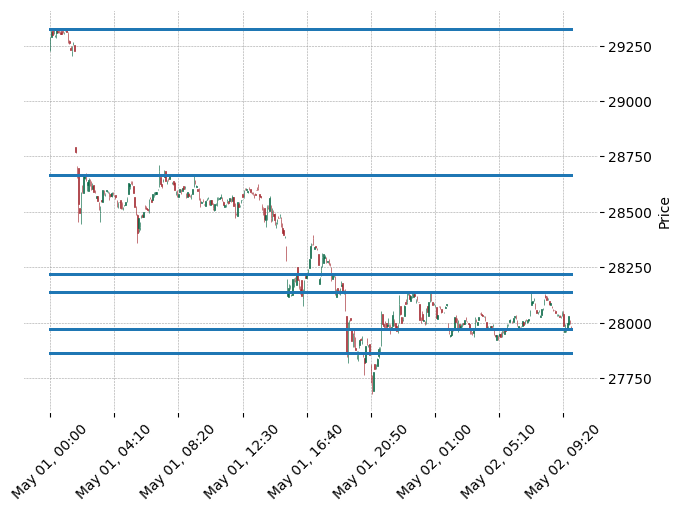

In [109]:
mpf.plot(df, type='candle', hlines=levels.to_list(),style='charles')